In [18]:
from binance.client import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
api_key = 'haWzm6Ujj0SdpaCeCBiyyAvTvS78odvplgl4W9t29CVgSq5LrAHpt940JYQCt5TD'
secret_key = 'SgoyFqlJ6SvCYSXPFsU1ehPzQHhsfFV3Pa5scLF6y0stOO0aYXpfig6Fy4N0ePWX'
client = Client(api_key=api_key, api_secret=secret_key, tld='com')
account = client.get_account()

In [11]:

def get_history(symbol, interval, start, end=None):
    bars = client.get_historical_klines(
        symbol=symbol, interval=interval, start_str=start, end_str=end)
    df = pd.DataFrame(bars)
    df['Date'] = pd.to_datetime(df.iloc[:, 0], unit='ms')
    df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Clos Time', 'Quote Asset Volume',
                  'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore', 'Date']
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    df.set_index('Date', inplace=True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

timestamp = client._get_earliest_valid_timestamp(
    symbol='BTCUSDT', interval='1d')


data = get_history('BTCUSDT', '1h', timestamp)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44194 entries, 2017-08-17 04:00:00 to 2022-09-06 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44194 non-null  float64
 1   High    44194 non-null  float64
 2   Low     44194 non-null  float64
 3   Close   44194 non-null  float64
 4   Volume  44194 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [14]:
data = data[["Close","Volume"]].copy()

In [16]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2022-09-06 16:00:00,19747.25,14040.250420
2022-09-06 17:00:00,19102.32,36618.678510
2022-09-06 18:00:00,18958.66,18616.998750


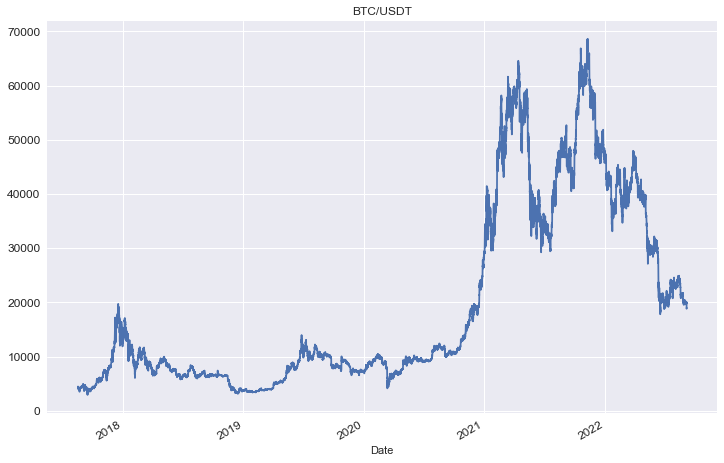

In [22]:
data.Close.plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

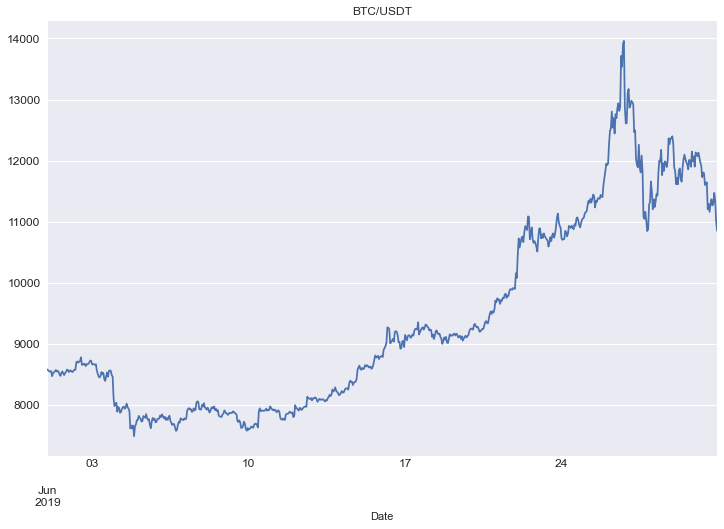

In [23]:
data.Close.loc['2019-06'].plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

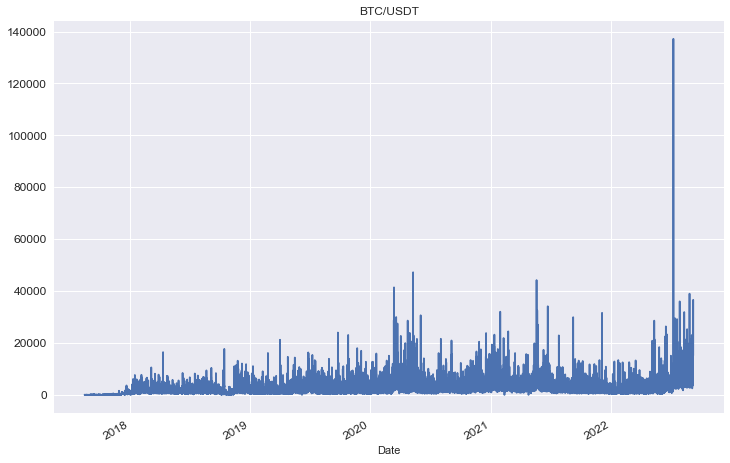

In [25]:
data.Volume.plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

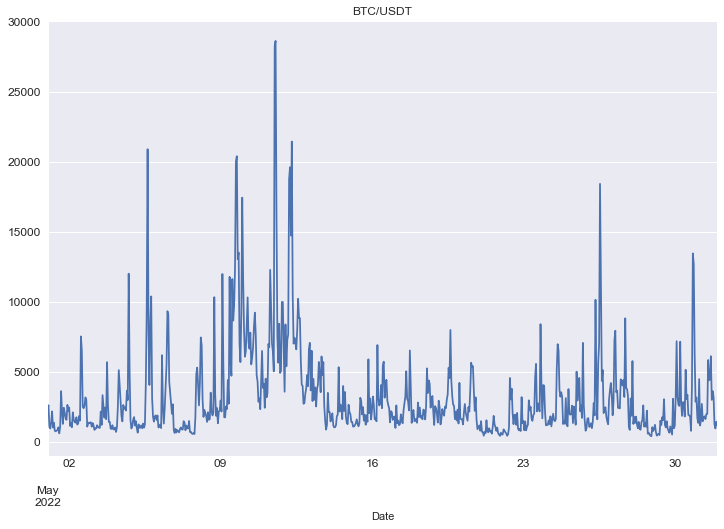

In [27]:
data.Volume.loc['2022-05'].plot(figsize = (12,8),title="BTC/USDT",fontsize=12)
plt.show()

In [29]:
data['returns'] = np.log(data.Close.div(data.Close.shift(1)))
data.describe()

,Close,Volume,returns
count,44194.000000,44194.000000,44193.000000
mean,19498.750675,2330.740991,0.000034
std,17248.438968,2615.538690,0.009270
min,2919.000000,0.000000,-0.201033
25%,7154.430000,956.115705,-0.003014
50%,10112.910000,1604.841909,0.000104
75%,33380.597500,2784.602032,0.003223
max,68633.690000,137207.188600,0.160280


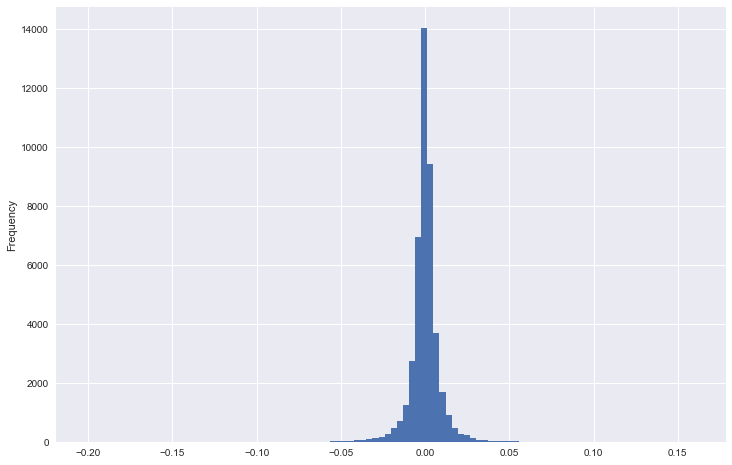

In [30]:
data.returns.plot(kind='hist',bins=100,figsize=(12,8))
plt.show()

In [33]:
data.returns.nlargest(10)

Date
2020-03-13 02:00:00    0.160280
2017-09-15 12:00:00    0.131731
2020-03-15 21:00:00    0.129546
2017-09-15 14:00:00    0.117777
2021-01-29 08:00:00    0.116145
2017-09-05 02:00:00    0.113257
2018-01-17 16:00:00    0.108790
2018-04-12 11:00:00    0.103325
2018-10-15 06:00:00    0.100727
2019-07-18 14:00:00    0.089576
Name: returns, dtype: float64

In [32]:
data.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

In [34]:
data.Close / data.Close[0]

Date
2017-08-17 04:00:00    1.000000
2017-08-17 05:00:00    1.001506
2017-08-17 06:00:00    1.003602
2017-08-17 07:00:00    1.009552
2017-08-17 08:00:00    1.012036
                         ...   
2022-09-06 16:00:00    4.582973
2022-09-06 17:00:00    4.433296
2022-09-06 18:00:00    4.399955
2022-09-06 19:00:00    4.368798
2022-09-06 20:00:00    4.405985
Name: Close, Length: 44194, dtype: float64

In [35]:
data.returns.sum()

1.4829638256189648

In [36]:
multiple = np.exp(data.returns.sum())
multiple

4.40598491934002

In [37]:
data['creturns'] = data.returns.cumsum().apply(np.exp)
data

,Close,Volume,returns,creturns
Date,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036
...,...,...,...,...
2022-09-06 16:00:00,19747.25,14040.250420,-0.003595,4.582973
2022-09-06 17:00:00,19102.32,36618.678510,-0.033204,4.433296
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955


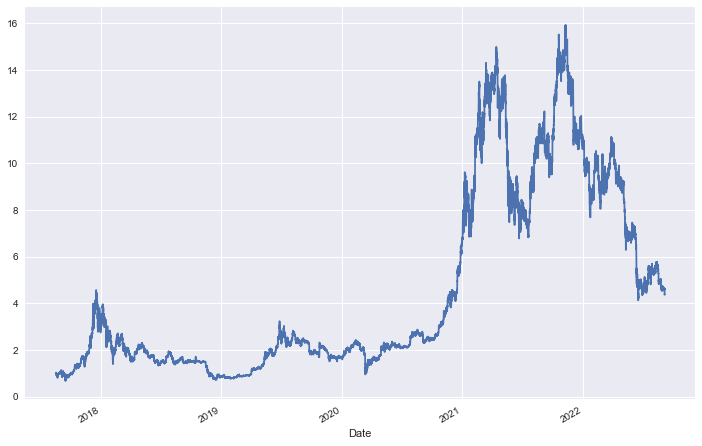

In [39]:
data.creturns.plot(figsize=(12,8))
plt.show()

In [41]:
mu = data.returns.mean()
mu

3.3556532157105534e-05

In [42]:
std = data.returns.std()
std

0.009269976905562928

In [43]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [44]:
ann_mean = mu * number_of_periods
ann_mean

0.2941565608891871

In [46]:
ann_std = std * number_of_periods
ann_std

81.26061755416463

In [48]:
cagr = np.exp(ann_mean)
cagr

1.3419939909933267

In [49]:
ann_mean / ann_std

0.0036199153998936295

In [50]:
cagr / ann_std

0.01651469101990044

In [52]:
data['vol_ch'] = np.log(data.Volume.div(data.Volume.shift(1)))
data

c:\Users\AndreyIchshenko\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2022-09-06 16:00:00,19747.25,14040.250420,-0.003595,4.582973,-0.076679
2022-09-06 17:00:00,19102.32,36618.678510,-0.033204,4.433296,0.958630
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483


In [54]:
data.vol_ch.nsmallest(20)

Date
2017-09-06 16:00:00        -inf
2019-06-07 21:00:00        -inf
2021-02-11 03:00:00        -inf
2021-04-25 04:00:00   -5.644090
2018-01-04 03:00:00   -5.428025
2019-06-07 20:00:00   -4.780619
2017-08-19 23:00:00   -3.801014
2017-08-20 09:00:00   -3.782857
2017-08-26 04:00:00   -3.470297
2017-12-04 06:00:00   -3.178488
2017-09-24 21:00:00   -2.749294
2017-08-21 09:00:00   -2.643555
2017-08-19 19:00:00   -2.357538
2020-06-09 01:00:00   -2.157645
2017-08-20 03:00:00   -2.106886
2018-10-06 03:00:00   -2.072737
2017-09-12 20:00:00   -1.948525
2019-10-13 21:00:00   -1.905406
2017-10-07 04:00:00   -1.901772
2022-06-01 21:00:00   -1.896834
Name: vol_ch, dtype: float64

In [55]:
data.vol_ch.nlargest(20)

Date
2017-09-06 23:00:00         inf
2019-06-07 22:00:00         inf
2021-02-11 05:00:00         inf
2018-01-04 05:00:00    5.256246
2021-04-25 08:00:00    5.051831
2017-08-20 00:00:00    3.794985
2017-08-26 05:00:00    3.428566
2022-03-27 20:00:00    2.949728
2017-08-20 11:00:00    2.904046
2017-10-12 00:00:00    2.884007
2017-12-04 07:00:00    2.851238
2019-07-27 10:00:00    2.808519
2017-08-20 15:00:00    2.779948
2022-07-08 14:00:00    2.674620
2019-12-16 18:00:00    2.658757
2017-08-20 05:00:00    2.585916
2019-09-06 17:00:00    2.579215
2018-04-12 11:00:00    2.562466
2020-06-10 18:00:00    2.537417
2018-10-15 05:00:00    2.525149
Name: vol_ch, dtype: float64

In [61]:
data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
data.loc[data.vol_ch < -3, "vol_ch"] = np.nan

<AxesSubplot:ylabel='Frequency'>

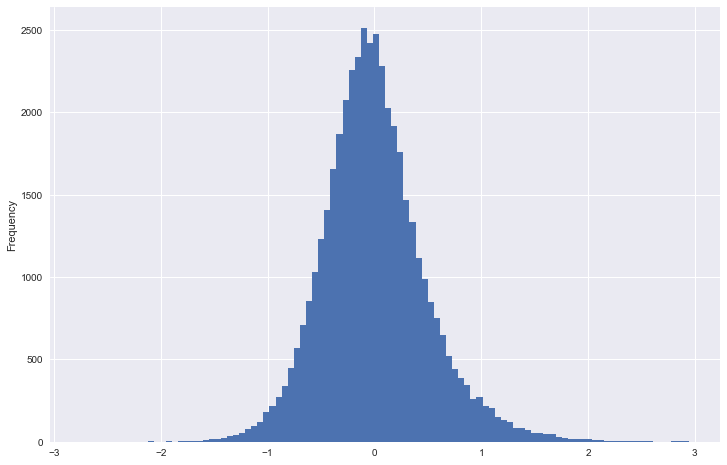

In [64]:
data.vol_ch.plot(kind='hist',bins=100,figsize=(12,8))

In [65]:
data

,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2022-09-06 16:00:00,19747.25,14040.250420,-0.003595,4.582973,-0.076679
2022-09-06 17:00:00,19102.32,36618.678510,-0.033204,4.433296,0.958630
2022-09-06 18:00:00,18958.66,18616.998750,-0.007549,4.399955,-0.676483


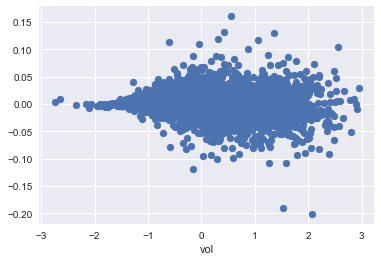

In [67]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.show()